# <font color=blue>Deep Learning in Python</font> 

Deep learning is the machine learning technique behind the most exciting capabilities in diverse areas like robotics, natural language processing, image recognition and artificial intelligence (including the famous AlphaGo). In this course, you'll gain hands-on, practical knowledge of how to use deep learning with Keras 2.0, the latest version of a cutting edge library for deep learning in Python.

## <font color=red>01 - Basics of deep learning and neural networks   </font> 

 In this chapter, you'll become familiar with the fundamental concepts and terminology used in deep learning, and understand why deep learning techniques are so powerful today. You'll build simple neural networks yourself and generate predictions with them. 

<div class="dc-u-p-24"><h1 class="dc-h3">Comparing neural network models to classical regression models</h1><div class=""><p><p>Which of the models in the diagrams has greater ability to account for interactions?</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch1ex2.png" alt="Ch1Ex2"></p></div></div>

Model 2

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Coding the forward propagation algorithm</h1><div class=""><p><p>In this exercise, you'll write code to do forward propagation (prediction) for your first neural network:</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/1_4.png" alt="Ch1Ex4"></p>
<p>Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course. </p>
<p>The input data has been pre-loaded as <code>input_data</code>, and the weights are available in a dictionary called <code>weights</code>. The array of weights for the first node in the hidden layer are in <code>weights['node_0']</code>,
and the array of weights for the second node in the hidden layer are in <code>weights['node_1']</code>.</p>
<p>The weights feeding into the output node are available in <code>weights['output']</code>.</p>
<p>NumPy will be pre-imported for you as <code>np</code> in all exercises.</p></div></div>

<div class="exercise--instructions__content"><ul>
<li>Calculate the value in node 0 by multiplying <code>input_data</code> by its weights <code>weights['node_0']</code> and computing their sum. This is the 1st node in the hidden layer.</li>
<li>Calculate the value in node 1 using <code>input_data</code> and <code>weights['node_1']</code>. This is the 2nd node in the hidden layer.</li>
<li>Put the hidden layer values into an array. This has been done for you.</li>
<li>Generate the prediction by multiplying <code>hidden_layer_outputs</code> by <code>weights['output']</code> and computing their sum. </li>
</ul></div>

In [27]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
input_data = np.array([3,5])
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [3]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


In [4]:
weights

{'node_0': array([2, 4]), 'node_1': array([ 4, -5]), 'output': array([2, 7])}

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">The Rectified Linear Activation Function</h1><div class=""><p><p>As Dan explained to you in the video, an "activation function" is a function applied at each node. It converts the node's input into some output. </p>
<p>The rectified linear activation function (called <em>ReLU</em>) has been shown to lead to very high-performance networks.
This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.  </p>
<p>Here are some examples:<br>
<strong>relu(3) = 3</strong> <br>
<strong>relu(-3) = 0</strong> <br></p></div></div>

In [5]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


 You predicted 52 transactions. Without this activation function, you would have predicted a negative number! The real power of activation functions will come soon when you start tuning model weights.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Applying the network to many observations/rows of data</h1><div class=""><p>You'll now define a function called <code>predict_with_network()</code> which will generate predictions for multiple data observations, which are pre-loaded as <code>input_data</code>. As before, <code>weights</code> are also pre-loaded. In addition, the <code>relu()</code> function you defined in the previous exercise has been pre-loaded.</p></div></div>

<div class="exercise--instructions__content"><ul>
<li>Define a function called <code>predict_with_network()</code> that accepts two arguments - <code>input_data_row</code> and <code>weights</code> - and returns a prediction from the network as the output.</li>
<li>Calculate the input and output values for each node, storing them as: <code>node_0_input</code>, <code>node_0_output</code>, <code>node_1_input</code>, and <code>node_1_output</code>.<ul>
<li>To calculate the input value of a node, multiply the relevant arrays together and compute their sum. </li>
<li>To calculate the output value of a node, apply the <code>relu()</code> function to the input value of the node.</li></ul></li>
<li>Calculate the model output by calculating <code>input_to_final_layer</code> and <code>model_output</code> in the same ay you calculated the input and output values for the nodes.</li>
<li>Use a <code>for</code> loop to iterate over <code>input_data</code>:<ul>
<li>Use your <code>predict_with_network()</code> to generate predictions for each row of the <code>input_data</code> - <code>input_data_row</code>. Append each prediction to <code>results</code>.</li></ul></li>
</ul></div>

In [6]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]

In [7]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


<img src="./pics/01.png" width="600">
<img src="./pics/02.png" width="600">
<img src="./pics/03.png" width="600">


<div class="dc-u-p-24"><h1 class="dc-h3">Forward propagation in a deeper network</h1><div class=""><p><p>You now have a model with 2 hidden layers.  The values for an input data point are shown inside the input nodes. The weights are shown on the edges/lines. What prediction would this model make on this data point?</p>
<p>Assume the activation function at each node is the <em>identity function</em>. That is, each node's output will be the same as its input. So the value of the bottom node in the first hidden layer is -1, and not 0, as it would be if the ReLU activation function was used.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch1ex9.png" alt="Ch1Ex9"></p></div></div>

0

<div class="dc-u-p-24"><h1 class="dc-h3">Forward propagation in a deeper network</h1><div class=""><p><p>You now have a model with 2 hidden layers.  The values for an input data point are shown inside the input nodes. The weights are shown on the edges/lines. What prediction would this model make on this data point?</p>
<p>Assume the activation function at each node is the <em>identity function</em>. That is, each node's output will be the same as its input. So the value of the bottom node in the first hidden layer is -1, and not 0, as it would be if the ReLU activation function was used.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch1ex9.png" alt="Ch1Ex9"></p></div></div>

0

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Multi-layer neural networks</h1><div class=""><p><p>In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The input data has been preloaded as <code>input_data</code>. The nodes in the first hidden layer are called <code>node_0_0</code> and <code>node_0_1</code>. Their weights are pre-loaded as <code>weights['node_0_0']</code> and <code>weights['node_0_1']</code> respectively.</p>
<p>The nodes in the second hidden layer are called <code>node_1_0</code> and <code>node_1_1</code>. Their weights are pre-loaded as <code>weights['node_1_0']</code> and <code>weights['node_1_1']</code> respectively.</p>
<p>We then create a model output from the hidden nodes using weights pre-loaded as <code>weights['output']</code>.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch1ex10.png" alt="Ch1Ex10"></p></div></div>

In [8]:
input_data = np.array([3,5])
weights = {'node_0_0': np.array([2, 4]), 'node_0_1': np.array([ 4, -5]), 'node_1_0': np.array([-1, 2]),
           'node_1_1': np.array([1, 2]), 'output': np.array([2, 7])}

In [9]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


<div class="dc-u-p-24"><h1 class="dc-h3">Representations are learned</h1><div class=""><p><p>How are the weights that determine the features/interactions in Neural Networks created?</p></div></div>

**The model training process sets them to optimize predictive accuracy.**

<div class="dc-u-p-24"><h1 class="dc-h3">Levels of representation</h1><div class=""><p><p>Which layers of a model capture more complex or "higher level" interactions?</p></div></div>

**The last layers capture the most complex interactions.**

## <font color=red>02 - Optimizing a neural network with backward propagation   </font> 

 Here, you'll learn how to optimize the predictions generated by your neural networks. You'll do this using a method called backward propagation, which is one of the most important techniques in deep learning. Understanding how it works will give you a strong foundation to build from in the second half of the course. 

<img src="./pics/04.png" width="600">
<img src="./pics/05.png" width="600">
<img src="./pics/06.png" width="600">
<img src="./pics/07.png" width="600">
<img src="./pics/08.png" width="600">
<img src="./pics/09.png" width="600">
<img src="./pics/10.png" width="600">
<img src="./pics/11.png" width="600">
<img src="./pics/12.png" width="600">

<div class="dc-u-p-24"><h1 class="dc-h3">Calculating model errors</h1><div class=""><p><p>For the exercises in this chapter, you'll continue working with the network to predict transactions for a bank.</p>
<p>What is the error (predicted - actual) for the following network when the input data is [3, 2] and the actual value of the target (what you are trying to predict) is 5? It may be helpful to get out a pen and piece of paper to calculate these values.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch2_ex2_3.png" alt="Ch2Ex2"></p></div></div>

11

<div class="dc-u-p-24"><h1 class="dc-h3">Understanding how weights change model accuracy</h1><div class=""><p><p>Imagine you have to make a prediction for a single data point. The actual value of the target is 7. The weight going from <code>node_0</code> to the output is 2, as shown below.  If you increased it slightly, changing it to 2.01, would the predictions become more accurate, less accurate, or stay the same?</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch2_ex2_3.png" alt="Ch2Ex3"></p></div></div>

Less accurate.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Coding how weight changes affect accuracy</h1><div class=""><p><p>Now you'll get to change weights in a real network and see how they affect model accuracy!</p>
<p>Have a look at the following neural network:
<img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch2ex4.png" alt="Ch2Ex4"></p>
<p>Its weights have been pre-loaded as <code>weights_0</code>. Your task in this exercise is to update a <strong>single</strong> weight in <code>weights_0</code> to create <code>weights_1</code>, which gives a perfect prediction (in which the predicted value is equal to <code>target_actual</code>: 3). </p>
<p>Use a pen and paper if necessary to experiment with different combinations. You'll use the <code>predict_with_network()</code> function, which takes an array of data as the first argument, and weights as the second argument.</p></div></div>

In [10]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [11]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 1],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


The network now generates a perfect prediction with an error of 0.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Scaling up to multiple data points</h1><div class=""><p><p>You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as <code>weights_0</code> and <code>weights_1</code>.  </p>
<p><code>input_data</code> is a list of arrays.  Each item in that list contains the data to make a single prediction.
<code>target_actuals</code> is a list of numbers. Each item in that list is the actual value we are trying to predict.</p>
<p>In this exercise, you'll use the <code>mean_squared_error()</code> function from <code>sklearn.metrics</code>. It takes the true values and the predicted values as arguments.</p>
<p>You'll also use the preloaded <code>predict_with_network()</code> function, which takes an array of data as the first argument, and weights as the second argument.</p></div></div>

In [12]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

In [13]:
weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1. , 1.5]), 'output': np.array([1. , 1.5])}
target_actuals = np.array([1, 3, 5, 7])

In [14]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row,weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


<p class="">Excellent work! It looks like <code>model_output_1</code> has a higher mean squared error.</p>

<img src="./pics/13.png" width="600">
<img src="./pics/14.png" width="600">
<img src="./pics/15.png" width="600">
<img src="./pics/16.png" width="600">
<img src="./pics/17.png" width="600">

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Calculating slopes</h1><div class=""><p><p>You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is `2 * x * (y-xb)`, or `2 * input_data * error`. Note that <code>x</code> and <code>b</code> may have multiple numbers (<code>x</code> is a vector for each data point, and <code>b</code> is a vector).  In this case, the output will also be a vector, which is exactly what you want. </p>
<p>You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called <code>weights</code> as well as data for a single point called <code>input_data</code>.  The actual value of the target you want to predict is stored in <code>target</code>.</p></div></div>

In [15]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

In [16]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = target - preds

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[-14 -28 -42]


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Improving model weights</h1><div class=""><p><p>Hurray!  You've just calculated the slopes you need.  Now it's time to use those slopes to improve your model.  If you add the slopes to your weights, you will move in the right direction.  However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.</p>
<p>The weights have been pre-loaded as <code>weights</code>, the actual value of the target as <code>target</code>, and the input data as <code>input_data</code>. The predictions from the initial weights are stored as <code>preds</code>.</p></div></div>

In [17]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Making multiple updates to weights</h1><div class=""><p><p>You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update. </p>
<p>To keep your code clean, there is a pre-loaded <code>get_slope()</code> function that takes <code>input_data</code>, <code>target</code>, and <code>weights</code> as arguments. There is also a <code>get_mse()</code> function that takes the same arguments.  The <code>input_data</code>, <code>target</code>, and <code>weights</code> have been pre-loaded. </p>
<p>This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node.  Note that <code>weights</code> is a single array.</p>
<p>We have also pre-loaded <code>matplotlib.pyplot</code>, and the error history will be plotted after you have done your gradient descent steps.</p></div></div>

In [18]:
import matplotlib.pyplot as plt
weights = np.array([0,2,1])

In [19]:
def get_slope(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    slope = 2 * input_data * error
    return slope

def get_mse(input_data, target, weights):
    preds = (weights * input_data).sum()
    error_updated = preds - target
    return error_updated

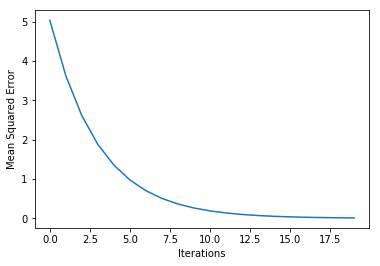

In [20]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)

    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

<img src="./pics/18.png" width="600">
<img src="./pics/19.png" width="600">
<img src="./pics/20.png" width="600">
<img src="./pics/21.png" width="600">

### The relationship between forward and backward propagation

If you have gone through 4 iterations of calculating slopes (using backward propagation) and then updated weights, how many times must you have done forward propagation?

__4__

### Thinking about backward propagation

If your predictions were all exactly right, and your errors were all exactly 0, the slope of the loss function with respect to your predictions would also be 0. In that circumstance, which of the following statements would be correct?

__The updates to all weights in the network would also be 0.__

<img src="./pics/22.png" width="600">
<img src="./pics/23.png" width="600">

<div class="dc-u-p-24"><h1 class="dc-h3">A round of backpropagation</h1><div class=""><p><p>In the network shown below, we have done forward propagation, and node values calculated as part of forward propagation are shown in white. The weights are shown in black.  Layers after the question mark show the slopes calculated as part of back-prop, rather than the forward-prop values. Those slope values are shown in purple.  </p>
<p>This network again uses the ReLU activation function, so the slope of the activation function is 1 for any node receiving a positive value as input. Assume the node being examined had a positive value (so the activation function's slope is 1).</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch2ex14_1.png" alt="Ch2Ex14_1"></p>
<p>What is the slope needed to update the weight with the question mark?</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch2ex14_2.png" alt="Ch2Ex14_2"></p></div></div>

__6__

## <font color=red>03 - Building deep learning models with keras  </font> 

 In this chapter, you'll use the keras library to build deep learning models for both regression as well as classification! You'll learn about the Specify-Compile-Fit workflow that you can use to make predictions and by the end of this chapter, you'll have all the tools necessary to build deep neural networks! 

<img src="./pics/24.png" width="600">

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Understanding your data</h1><div class=""><p><p>You will soon start building models in Keras to predict wages based on various professional and demographic factors. Before you start building a model, it's good to understand your data by performing some exploratory analysis.</p>
<p>The data is pre-loaded into a pandas DataFrame called <code>df</code>.  Use the <code>.head()</code> and <code>.describe()</code> methods in the IPython Shell for a quick overview of the DataFrame.</p>
<p>The target variable you'll be predicting is <code>wage_per_hour</code>. Some of the predictor variables are binary indicators, where a value of 1 represents <code>True</code>, and 0 represents <code>False</code>.</p>
<p>Of the 9 predictor variables in the DataFrame, how many are binary indicators? The min and max values as shown by <code>.describe()</code> will be informative here.
How many binary indicator predictors are there?</p></div></div>

6

In [21]:
df= pd.read_csv('./data/hourly_wages.csv')
predictors = df.drop('wage_per_hour', axis=1).values
target = df['wage_per_hour'].values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
wage_per_hour     534 non-null float64
union             534 non-null int64
education_yrs     534 non-null int64
experience_yrs    534 non-null int64
age               534 non-null int64
female            534 non-null int64
marr              534 non-null int64
south             534 non-null int64
manufacturing     534 non-null int64
construction      534 non-null int64
dtypes: float64(1), int64(9)
memory usage: 41.8 KB


In [23]:
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [24]:
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Specifying a model</h1><div class=""><p><p>Now you'll get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.</p>
<p>To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.</p>
<p>As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience.  You can find the dataset in a pandas dataframe called <code>df</code>.  For convenience, everything in <code>df</code> except for the target has been converted to a NumPy matrix called <code>predictors</code>. The target, <code>wage_per_hour</code>, is available as a NumPy matrix called <code>target</code>.</p>
<p>For all exercises in this chapter, we've imported the <code>Sequential</code> model constructor, the <code>Dense</code> layer constructor, and pandas.</p></div></div>

In [28]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

<img src="./pics/25.png" width="600">

<img src="./pics/26.png" width="600">

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Compiling the model</h1><div class=""><p><p>You're now going to compile the model you specified earlier. To compile the model, you need to specify the optimizer and loss function to use. In the video, Dan mentioned that the Adam optimizer is an excellent choice. You can read more about it as well as other keras optimizers <a href="https://keras.io/optimizers/#adam" target="_blank" rel="noopener noreferrer">here</a>, and if you are really curious to learn more, you can read the <a href="https://arxiv.org/abs/1412.6980v8" target="_blank" rel="noopener noreferrer">original paper</a> that introduced the Adam optimizer.</p>
<p>In this exercise, you'll use the Adam optimizer and the mean squared error loss function. Go for it!</p></div></div>

In [29]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Fitting the model</h1><div class=""><p><p>You're at the most fun part. You'll now fit the model. Recall that the data to be used as predictive features is loaded in a NumPy matrix called <code>predictors</code> and the data to be predicted is stored in a NumPy matrix called <code>target</code>. Your <code>model</code> is pre-written and it has been compiled with the code from the previous exercise.</p></div></div>

In [34]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors, target, epochs=10)

Epoch 1/10
534/534 [==============================] - 1s 2ms/step - loss: 43.8490
Epoch 2/10
534/534 [==============================] - 0s 97us/step - loss: 29.4287
Epoch 3/10
534/534 [==============================] - 0s 88us/step - loss: 26.1476
Epoch 4/10
534/534 [==============================] - 0s 146us/step - loss: 24.4325
Epoch 5/10
534/534 [==============================] - 0s 92us/step - loss: 23.1868
Epoch 6/10
534/534 [==============================] - 0s 107us/step - loss: 22.4542
Epoch 7/10
534/534 [==============================] - 0s 90us/step - loss: 22.0103
Epoch 8/10
534/534 [==============================] - 0s 84us/step - loss: 21.6234
Epoch 9/10
534/534 [==============================] - 0s 77us/step - loss: 21.4946
Epoch 10/10
534/534 [==============================] - 0s 88us/step - loss: 21.2546


<img src="./pics/27.png" width="600">

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Understanding your classification data</h1><div class=""><p><p>Now you will start modeling with a new dataset for a classification problem. This data includes information about passengers on the Titanic.  You will use predictors such as <code>age</code>, <code>fare</code> and where each passenger embarked from to predict who will survive.  This data is from <a href="https://www.kaggle.com/c/titanic" target="_blank" rel="noopener noreferrer">a tutorial on data science competitions</a>.  Look <a href="https://www.kaggle.com/c/titanic/data" target="_blank" rel="noopener noreferrer">here</a> for descriptions of the features.</p>
<p>The data is pre-loaded in a pandas DataFrame called <code>df</code>.</p>
<p>It's smart to review the maximum and minimum values of each variable to ensure the data isn't misformatted or corrupted.  What was the maximum age of passengers on the Titanic? Use the <code>.describe()</code> method in the IPython Shell to answer this question.</p></div></div>

In [39]:
df = pd.read_csv('./data/titanic_all_numeric.csv')
#target= df.survived.values
predictors = df.drop('survived', axis=1).values
n_cols = 10

In [36]:
df.age.max()

80.0

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Last steps in classification models</h1><div class=""><p><p>You'll now create a classification model using the titanic dataset, which has been pre-loaded into a DataFrame called <code>df</code>. You'll take information about the passengers and predict which ones survived. </p>
<p>The predictive variables are stored in a NumPy array <code>predictors</code>. The target to predict is in <code>df.survived</code>, though you'll have to manipulate it for keras. The number of predictive features is stored in <code>n_cols</code>. </p>
<p>Here, you'll use the <code>'sgd'</code> optimizer, which stands for <a href="https://en.wikipedia.org/wiki/Stochastic_gradient_descent" target="_blank" rel="noopener noreferrer">Stochastic Gradient Descent</a>. You'll learn more about this in the next chapter!</p></div></div>

In [43]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target,epochs=10)

Epoch 1/10
891/891 [==============================] - 1s 820us/step - loss: 3.4577 - acc: 0.5421
Epoch 2/10
891/891 [==============================] - 0s 93us/step - loss: 1.2121 - acc: 0.6341
Epoch 3/10
891/891 [==============================] - 0s 85us/step - loss: 0.6338 - acc: 0.6857
Epoch 4/10
891/891 [==============================] - 0s 91us/step - loss: 0.7338 - acc: 0.6386
Epoch 5/10
891/891 [==============================] - 0s 71us/step - loss: 0.6147 - acc: 0.6824
Epoch 6/10
891/891 [==============================] - 0s 56us/step - loss: 0.6011 - acc: 0.6801
Epoch 7/10
891/891 [==============================] - 0s 54us/step - loss: 0.5941 - acc: 0.6914
Epoch 8/10
891/891 [==============================] - 0s 56us/step - loss: 0.5932 - acc: 0.6936
Epoch 9/10
891/891 [==============================] - 0s 59us/step - loss: 0.5876 - acc: 0.6936
Epoch 10/10
891/891 [==============================] - 0s 65us/step - loss: 0.5747 - acc: 0.7003


<img src="./pics/28.png" width="600">

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Making predictions</h1><div class=""><p><p>The trained network from your previous coding exercise is now stored as <code>model</code>. New data to make predictions is stored in a NumPy array as <code>pred_data</code>.  Use <code>model</code> to make predictions on your new data.</p>
<p>In this exercise, your predictions will be probabilities, which is the most common way for data scientists to communicate their predictions to colleagues.</p></div></div>

In [50]:
df = pd.read_csv('./data/titanic_all_numeric.csv')
pred_data = df.values[:,1:]
pred_data

array([[3, 22.0, 1, ..., 0, 0, 1],
       [1, 38.0, 1, ..., 1, 0, 0],
       [3, 26.0, 0, ..., 0, 0, 1],
       ...,
       [3, 29.69911764705882, 1, ..., 0, 0, 1],
       [1, 26.0, 0, ..., 1, 0, 0],
       [3, 32.0, 0, ..., 0, 1, 0]], dtype=object)

In [58]:
### # Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target, epochs=10)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true[:10])

Epoch 1/10
891/891 [==============================] - 1s 958us/step - loss: 5.0757 - acc: 0.5421
Epoch 2/10
891/891 [==============================] - 0s 95us/step - loss: 1.8086 - acc: 0.6195
Epoch 3/10
891/891 [==============================] - 0s 104us/step - loss: 1.3240 - acc: 0.6195
Epoch 4/10
891/891 [==============================] - 0s 84us/step - loss: 0.7047 - acc: 0.6577
Epoch 5/10
891/891 [==============================] - 0s 89us/step - loss: 0.6981 - acc: 0.6801
Epoch 6/10
891/891 [==============================] - 0s 94us/step - loss: 0.6234 - acc: 0.6869
Epoch 7/10
891/891 [==============================] - 0s 102us/step - loss: 0.6019 - acc: 0.6992
Epoch 8/10
891/891 [==============================] - 0s 105us/step - loss: 0.6212 - acc: 0.6813
Epoch 9/10
891/891 [==============================] - 0s 94us/step - loss: 0.5840 - acc: 0.6958
Epoch 10/10
891/891 [==============================] - 0s 86us/step - loss: 0.5951 - acc: 0.6936
[0.23817974 0.84052384 0.24670978 0

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 66        
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.save('model_file.h5')

In [59]:
from keras.models import load_model
my_model = load_model('model_file.h5')
predictions = my_model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true[:10])

[0.30240995 0.62521374 0.40978152 0.56577605 0.27522495 0.38322538
 0.5663069  0.47605383 0.49379933 0.56451344]


## <font color=red>04 - Fine-tuning keras models   </font> 

 Here, you'll learn how to optimize your deep learning models in keras. You'll learn how to validate your models, understand the concept of model capacity, and experiment with wider and deeper networks. Enjoy! 

<img src="./pics/29.png" width="600">

### Diagnosing optimization problems

Which of the following could prevent a model from showing an improved loss in its first few epochs?

- Learning rate too low.__
- Learning rate too high.
- Poor choice of activation function.
- *All of the above.

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Changing optimization parameters</h1><div class=""><p><p>It's time to get your hands dirty with optimization.  You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate.  You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.</p>
<p>For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic).  You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function <code>get_new_model()</code> that creates an unoptimized model to optimize.</p></div></div></div>

In [78]:
def get_new_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape = (10,)))
    model.add(Dense(2, activation='softmax'))
    return model

In [83]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors,target, epochs=2)



Testing model with learning rate: 0.000001

Epoch 1/2
891/891 [==============================] - 1s 1ms/step - loss: 1.5873
Epoch 2/2
891/891 [==============================] - 0s 70us/step - loss: 1.5863


Testing model with learning rate: 0.010000

Epoch 1/2
891/891 [==============================] - 1s 1ms/step - loss: 2.8344
Epoch 2/2
891/891 [==============================] - 0s 70us/step - loss: 1.9257


Testing model with learning rate: 1.000000

Epoch 1/2
891/891 [==============================] - 1s 1ms/step - loss: 6.1914
Epoch 2/2
891/891 [==============================] - 0s 99us/step - loss: 6.1867


<img src="./pics/30.png" width="600">

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Evaluating model accuracy on validation dataset</h1><div class=""><p><p>Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as <code>model</code>. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.</p></div></div>

In [86]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3, epochs = 10)

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 2s 2ms/step - loss: 0.6814 - acc: 0.6180 - val_loss: 0.7586 - val_acc: 0.6530
Epoch 2/10
623/623 [==============================] - 0s 128us/step - loss: 0.6860 - acc: 0.6485 - val_loss: 0.6330 - val_acc: 0.7276
Epoch 3/10
623/623 [==============================] - 0s 148us/step - loss: 0.6584 - acc: 0.6469 - val_loss: 0.6367 - val_acc: 0.7015
Epoch 4/10
623/623 [==============================] - 0s 128us/step - loss: 0.5934 - acc: 0.7047 - val_loss: 0.6863 - val_acc: 0.6866
Epoch 5/10
623/623 [==============================] - 0s 156us/step - loss: 0.5878 - acc: 0.7030 - val_loss: 0.4955 - val_acc: 0.7500
Epoch 6/10
623/623 [==============================] - 0s 128us/step - loss: 0.5639 - acc: 0.7207 - val_loss: 0.5856 - val_acc: 0.6940
Epoch 7/10
623/623 [==============================] - 0s 128us/step - loss: 0.5793 - acc: 0.7207 - val_loss: 0.5188 - val_acc: 0.7313
Epoch 8/10
623/623

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Early stopping: Optimizing the optimization</h1><div class=""><p><p>Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more.  Since the optimization stops automatically when it isn't helping, you can also set a high value for <code>epochs</code> in your call to <code>.fit()</code>, as Dan showed in the video.</p>
<p>The model you'll optimize has been specified as <code>model</code>. As before, the data is pre-loaded as <code>predictors</code> and <code>target</code>.</p></div></div>

In [93]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=4)

# Fit the model
model.fit(predictors, target, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 2s 3ms/step - loss: 1.6795 - acc: 0.5586 - val_loss: 0.7659 - val_acc: 0.7276
Epoch 2/30
623/623 [==============================] - 0s 175us/step - loss: 0.7871 - acc: 0.5923 - val_loss: 0.6024 - val_acc: 0.7351
Epoch 3/30
623/623 [==============================] - 0s 176us/step - loss: 0.6976 - acc: 0.6966 - val_loss: 0.7760 - val_acc: 0.6530
Epoch 4/30
623/623 [==============================] - 0s 146us/step - loss: 0.7358 - acc: 0.6388 - val_loss: 0.6316 - val_acc: 0.7351
Epoch 5/30
623/623 [==============================] - 0s 168us/step - loss: 0.6547 - acc: 0.6790 - val_loss: 0.5110 - val_acc: 0.7575
Epoch 6/30
623/623 [==============================] - 0s 168us/step - loss: 0.5738 - acc: 0.7111 - val_loss: 0.5033 - val_acc: 0.7500
Epoch 7/30
623/623 [==============================] - 0s 167us/step - loss: 0.5655 - acc: 0.7047 - val_loss: 0.4816 - val_acc: 0.7500
Epoch 8/30
623/623

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Experimenting with wider networks</h1><div class=""><p><p>Now you know everything you need to begin experimenting with different models!</p>
<p>A model called <code>model_1</code> has been pre-loaded.  You can see a summary of this model printed in the IPython Shell.  This is a relatively small network, with only 10 units in each hidden layer. </p>
<p>In this exercise you'll create a new model called <code>model_2</code> which is similar to <code>model_1</code>, except it has 100 units in each hidden layer.</p>
<p>After you create <code>model_2</code>, both models will be fitted, and a graph showing both models loss score at each epoch will be shown.  We added the argument <code>verbose=False</code> in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.</p>
<p>Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.</p></div></div>

In [101]:
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

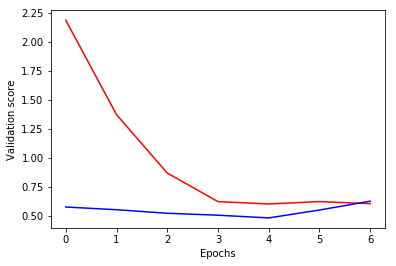

In [102]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Adding layers to a network</h1><div class=""><p><p>You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).  </p>
<p>Once again, you have a baseline model called <code>model_1</code> as a starting point. It has 1 hidden layer, with <code>50</code> units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).</p>
<p>This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.</p></div></div>

In [106]:
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 50)                550       
_________________________________________________________________
dense_135 (Dense)            (None, 2)                 102       
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


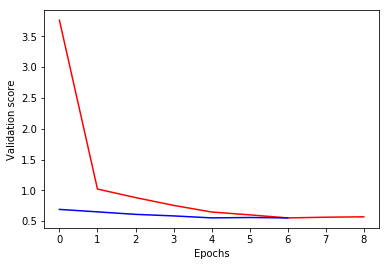

In [107]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu',input_shape=input_shape))
model_2.add(Dense(50, activation='relu',))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, 
                               callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, 
                               callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

<img src="./pics/31.png" width="600">
<img src="./pics/32.png" width="600">

<div class="dc-u-p-24"><h1 class="dc-h3">Experimenting with model structures</h1><div class=""><p><p>You've just run an experiment where you compared two networks that were identical except that the 2nd network had an extra hidden layer. You see that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?</p></div></div>

- Try a new network with fewer layers than anything you have tried yet.
- Use more units in each hidden layer. *
- Use fewer units in each hidden layer.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Building your own digit recognition model</h1><div class=""><p><p>You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits! </p>
<p>We've already done the basic manipulation of the MNIST dataset shown in the video, so you have <code>X</code> and <code>y</code> loaded and ready to model with. <code>Sequential</code> and <code>Dense</code> from keras are also pre-imported.</p>
<p>To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex. </p>
<p>If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a <a href="https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws" target="_blank" rel="noopener noreferrer">blog post</a> by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.</p>
<p>Ready to take your deep learning to the next level? Check out <a href="https://www.datacamp.com/courses/advanced-deep-learning-with-keras-in-python" target="_blank" rel="noopener noreferrer">Advanced Deep Learning with Keras in Python</a> to see how the Keras functional API lets you build domain knowledge to solve new types of problems. Once you know how to use the functional API, take a look at <a href="https://www.datacamp.com/courses/convolutional-neural-networks-for-image-processing" target="_blank" rel="noopener noreferrer">"Convolutional Neural Networks for Image Processing"</a> to learn image-specific applications of Keras.</p></div></div>

In [120]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = np.eye(10)[digits.target]

In [123]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(64,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3, epochs=10)

Train on 1257 samples, validate on 540 samples
Epoch 1/10
1257/1257 [==============================] - 5s 4ms/step - loss: 3.2966 - acc: 0.3015 - val_loss: 1.2975 - val_acc: 0.5667
Epoch 2/10
1257/1257 [==============================] - 0s 208us/step - loss: 0.7849 - acc: 0.7558 - val_loss: 0.7544 - val_acc: 0.7704
Epoch 3/10
1257/1257 [==============================] - 0s 241us/step - loss: 0.4167 - acc: 0.8791 - val_loss: 0.5957 - val_acc: 0.8148
Epoch 4/10
1257/1257 [==============================] - 0s 274us/step - loss: 0.2619 - acc: 0.9204 - val_loss: 0.5019 - val_acc: 0.8444
Epoch 5/10
1257/1257 [==============================] - 0s 243us/step - loss: 0.1840 - acc: 0.9443 - val_loss: 0.4626 - val_acc: 0.8667
Epoch 6/10
1257/1257 [==============================] - 0s 297us/step - loss: 0.1369 - acc: 0.9602 - val_loss: 0.4224 - val_acc: 0.8796
Epoch 7/10
1257/1257 [==============================] - 0s 224us/step - loss: 0.1047 - acc: 0.9730 - val_loss: 0.4188 - val_acc: 0.8833
Epo